<a href="https://colab.research.google.com/github/AnastasiyaRahulina/Seoul_bike_rent_prediction_study_project/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Задание к финальному проекту по блоку классического ML

Работаем с [данными](https://raw.githubusercontent.com/obulygin/content/main/SeoulBike/seoul_bike_data.csv) сервиса проката велосипедов в Корее за год.

Описание данных:
- Date - дата;
- Rented Bike Count - сколько велосипедов было взято в прокат, целевая переменная;
- Hour - час дня;
- Temperature - температура воздуха в градусах Цельсия;
- Humidity - влажность воздуха;
- Wind Speed - скорость ветра в м/с;
- Visibility - мера различимости объектов на расстоянии в 10 метров;
- Dew point temperature -  температура, зарегистрированная в начале дня, в градусах Цельсия;
- Solar Radiation - интенсивность солнечного света;
- Rainfall - количество осадков в мм;
- Snowfall - количество выпавшего снега в мм;
- Seasons - время года;
- Holiday - является ли день праздничным;
- Functioning Day - маркер, работал ли сервис проката в указанное время.

**Цель работы**: изучить данные и выявить факторы влияющие на спрос велосипедов.

**Задачи**:  
1) Провести предобработку данных: проверить данные на наличие выбросов, ошибочных значений, пропусков, дубликатов и некорректных типов.  
2) Провести EDA: реализовать все уровни анализа (одномерные/многомерные) с использованием визуализаций, изучить распределения и взаимосвязь признаков.  
3) Подготовить данные для построения модели (кодирование признаков, масштабирование, разбиение выборки на обучающую и тестовую).  
4) Реализовать базовую регрессионную модель прогнозирования количества велосипедов, взятых в прокат.  
5) При помощи инструментов Feature Selection и подбора гиперпараметров подобрать наилучшую прогнозную модель по adjusted R2 (основная метрика) и RMSE.

Работа должна быть оформлена в виде аналитического отчёта, каждый этап должен сопровождаться выводами.

Обязательный критерий: добиться adjusted R2 не менее 85%.

**Дополнительные** (необязательные) **критерии**:  
1) Использовать пайплайны.  
2) Для оптимизизации гиперпараметров использовать HyperOpt.   
3) Добиться adjusted R2 не менее 89%.    


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/mathshub/ml/seoul_bike_data.csv", encoding= 'unicode_escape')

#EDA

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.loc[(df['Rented Bike Count'] == 0) & (df['Functioning Day']=="Yes")]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


Дней, когда сервис работал, но велосипедов арендовано не было, не было. Эти строки можно удалить в начале анализа.

In [ ]:
df.drop(df.loc[df['Functioning Day']=="No"].index, inplace=True)

In [ ]:
df.drop(["Functioning Day"], axis=1, inplace=True)
#удаляем маркер, он больше не нужен

Text(0.5, 1.0, 'Distribution of Rented Bike Count')

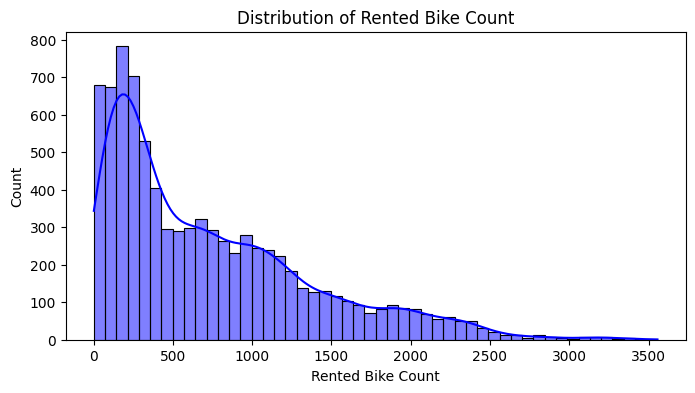

In [ ]:
distr_plot = plt.figure(figsize=(8,4))
sns.histplot(df['Rented Bike Count'], kde = True, bins=50,color='b')
plt.title('Distribution of Rented Bike Count')


Количество велосипедов, сданных в аренду является целевым показателем.
На графике видно, что распределение сильно скошено вправо, есть выбросы в районе 3000

Text(0.5, 1.0, 'Distribution of Solar Radiation (MJ/m2)')

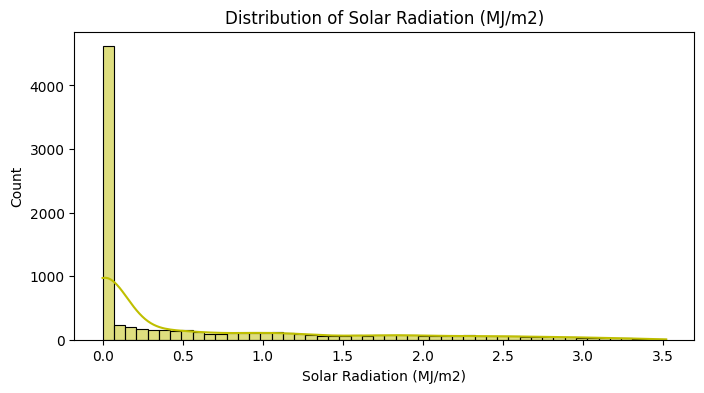

In [ ]:
distr_plot = plt.figure(figsize=(8,4))
sns.histplot(df['Solar Radiation (MJ/m2)'], kde = True, bins=50,color='y')
plt.title('Distribution of Solar Radiation (MJ/m2)')

В подавляющее количество дней солнечное излучение было равно нулю, и лишь в некоторые дни оно было значимым.

Text(0.5, 1.0, 'Distribution of Dew point temperature(°C)')

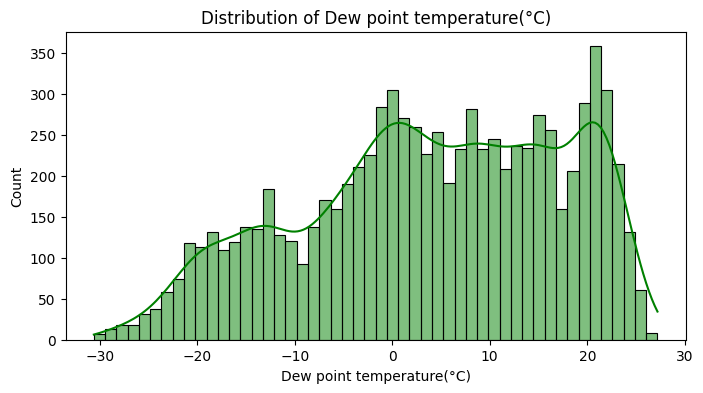

In [ ]:
distr_plot = plt.figure(figsize=(8,4))
sns.histplot(df['Dew point temperature(°C)'], kde = True, bins=50,color='g')
plt.title('Distribution of Dew point temperature(°C)')

Text(0.5, 1.0, 'Distribution of Humidity(%)')

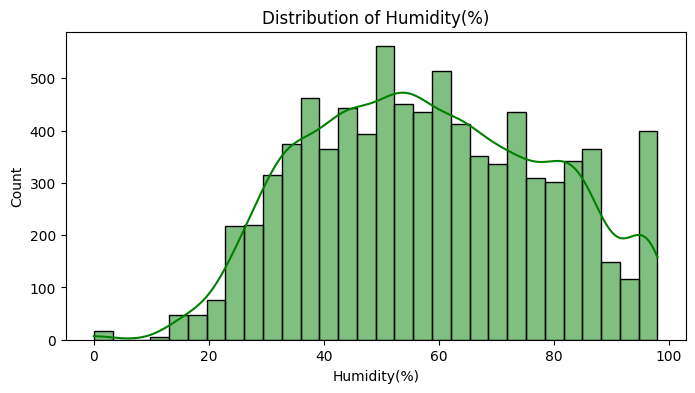

In [ ]:
distr_plot = plt.figure(figsize=(8,4))
sns.histplot(df['Humidity(%)'], kde = True, bins=30,color='g')
plt.title('Distribution of Humidity(%)')

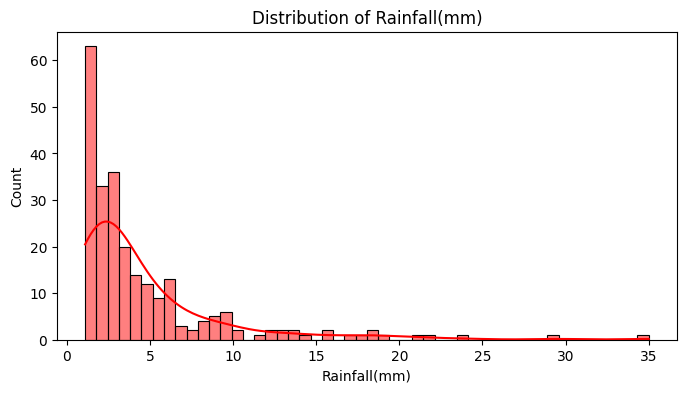

Доля дней с дождем: 13.21 %


In [ ]:
distr_plot = plt.figure(figsize=(8,4))
sns.histplot(df['Rainfall(mm)'].loc[df['Rainfall(mm)']>1], kde = True, bins=50, color='r')
plt.title('Distribution of Rainfall(mm)')
plt.show()
print(f"Доля дней с дождем: {(df['Rainfall(mm)'].loc[df['Rainfall(mm)']>1].sum()/len(df['Rainfall(mm)'])*100).round(2)} %")

На графике только дни с дождем.

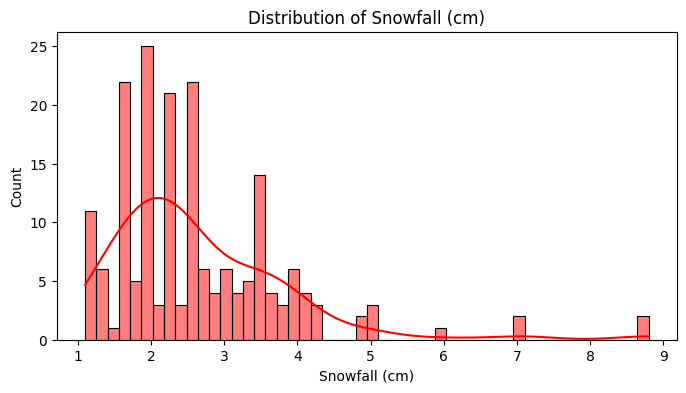

Доля снежных дней: 5.89 %


In [ ]:
distr_plot = plt.figure(figsize=(8,4))
sns.histplot(df['Snowfall (cm)'].loc[df['Snowfall (cm)']>1], kde = True, bins=50, color='r')
plt.title('Distribution of Snowfall (cm)')
plt.show()
print(f"Доля снежных дней: {(df['Snowfall (cm)'].loc[df['Snowfall (cm)']>1].sum()/len(df['Snowfall (cm)'])*100).round(2)} %")

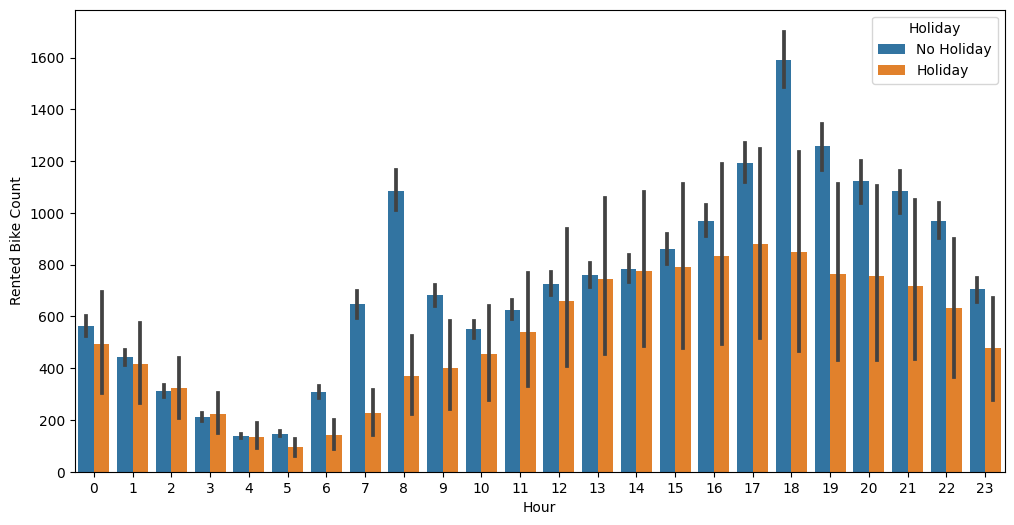

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Hour'], y=df['Rented Bike Count'], hue=df['Holiday'])
plt.show()

В будние дни есть пики в 7-8 утра и 17-19 вечера. Скорее всего, люди берут велосипед до/после работы. В выходные данных пиков не наблюдается. И, в целом, в выходные дни меньше велосипедов берут в аренду.

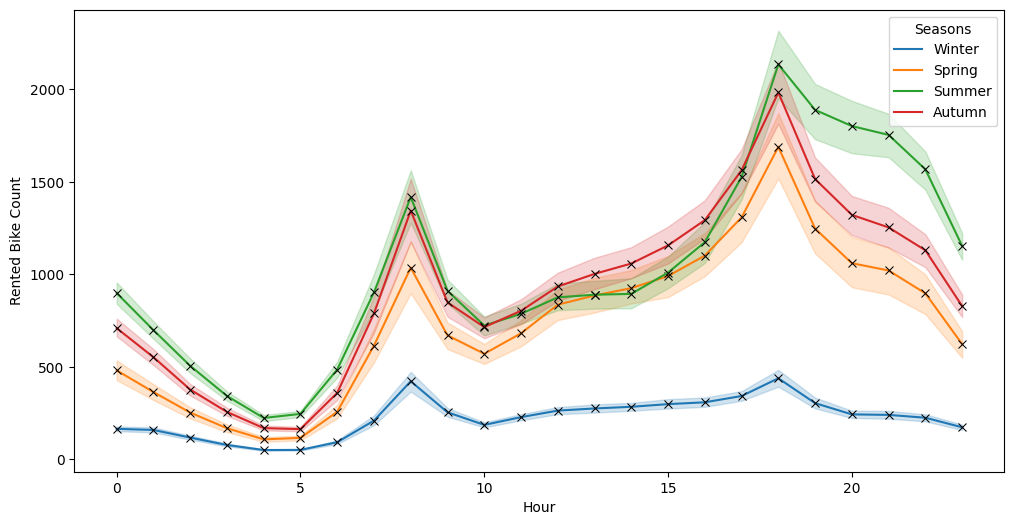

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['Hour'], y=df['Rented Bike Count'], hue=df['Seasons'], marker="x",markeredgecolor="black")
plt.show()

Динамика по сезонам схожая, за исключением зимы, когда велосипеды арендуют реже и оба пика более сглажены.

Ожидаемо, в осенние и летние месяцы велосипеды берут чаще.

<ipython-input-540-21195f777cc6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

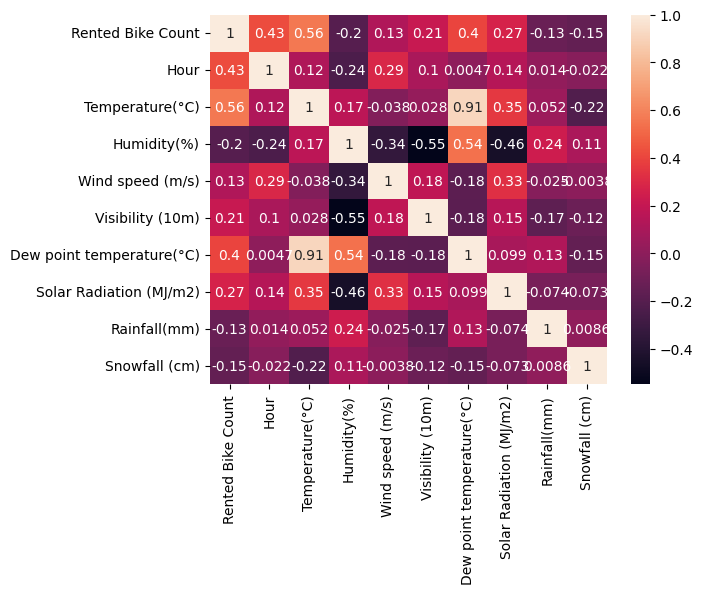

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot= True)

На матрице корреляции видно что целевой показатель умеренно коррелирует с  временем суток, а также с температурой воздуха и солнечным излучением. В остальном, значимая корелляция касается природных явлений (видимость/влажность, утренняя температура и влажность, температура и солнечное излучение). Коэффициент корреляции температуры и температуры в начале дня 0.91, возможно, придется оставить только один из этих признаков.

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday'],
      dtype='object')

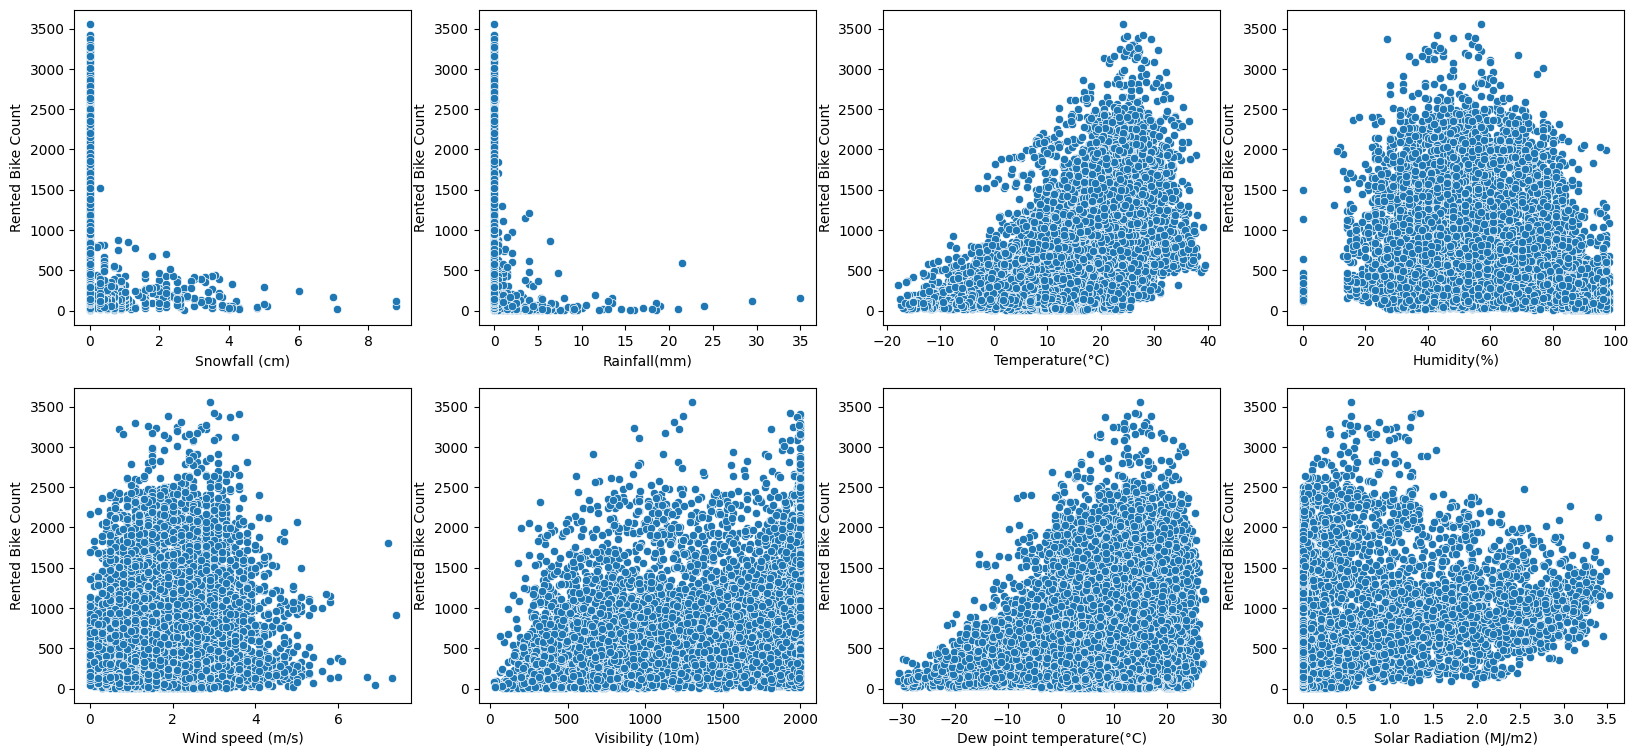

In [ ]:
fig, ax = plt.subplots(2,4, figsize=(20,9))
plt1 = sns.scatterplot(x=df['Snowfall (cm)'], y=df['Rented Bike Count'], ax=ax[0,0])
plt2 = sns.scatterplot(x=df['Rainfall(mm)'], y=df['Rented Bike Count'], ax=ax[0,1])
plt3 = sns.scatterplot(x=df['Temperature(°C)'], y=df['Rented Bike Count'], ax=ax[0,2])
plt4 = sns.scatterplot(x=df['Humidity(%)'], y=df['Rented Bike Count'], ax=ax[0,3])
plt5 = sns.scatterplot(x=df['Wind speed (m/s)'], y=df['Rented Bike Count'], ax=ax[1,0])
plt6 = sns.scatterplot(x=df['Visibility (10m)'], y=df['Rented Bike Count'], ax=ax[1,1])
plt7 = sns.scatterplot(x=df['Dew point temperature(°C)'], y=df['Rented Bike Count'], ax=ax[1,2])
plt8 = sns.scatterplot(x=df['Solar Radiation (MJ/m2)'], y=df['Rented Bike Count'], ax=ax[1,3])
plt.show()




Во время дождя, снегопада велосипеды арендуют реже. Их также реже арендуют при температуре менее 10 и более 35 градусов (это верно и в отношении утренней температуры). Также клиентов больше, когда влажность находится в средних значениях, однако смутила четко очерченая колонка значений влажности 0 - такие в природе не встречаются, это какие-то дефекты ввода/измерения, нужно их рассмотреть внимательнее.
Что касается скорости ветра, при экстремальных значениях явно велосипеды арендуют реже. Однако видны дни, когда при скорости ветра более 7 м/с почти 2000 человек арендовало велосипед, тут тоже стоит присмотреться.
При активном солнце также наблюдается тенденция брать велосипеды реже.

*Важно отметить, что экстремальные показатели природных явлений в принципе наблюдаются редко, и следует выяснить, насколько различия в аренде велосипедов значимы.


In [ ]:
df_clean = df.copy()
#создаем копию датасета, где буду изменяться данные

In [ ]:
#изменяем даты из типа объекта в тип дата, разделяем на 3 колонки день, месяц, убираем столбец дата. Данные о годе не нужны, поскольку они всего за один год
df_clean['Date'] = pd.to_datetime(df_clean['Date'], dayfirst=True)

In [ ]:
df_clean['Month']=df_clean['Date'].dt.month
df_clean['WeekDay']=df_clean['Date'].dt.day_name()
map_day={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
df_clean['WeekDayEncoding']=df_clean['WeekDay'].map(map_day)

In [ ]:
df_clean

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Month,WeekDay,WeekDayEncoding
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,12,Friday,5
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,12,Friday,5
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,12,Friday,5
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,12,Friday,5
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,12,Friday,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,11,Friday,5
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,11,Friday,5
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,11,Friday,5
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,11,Friday,5


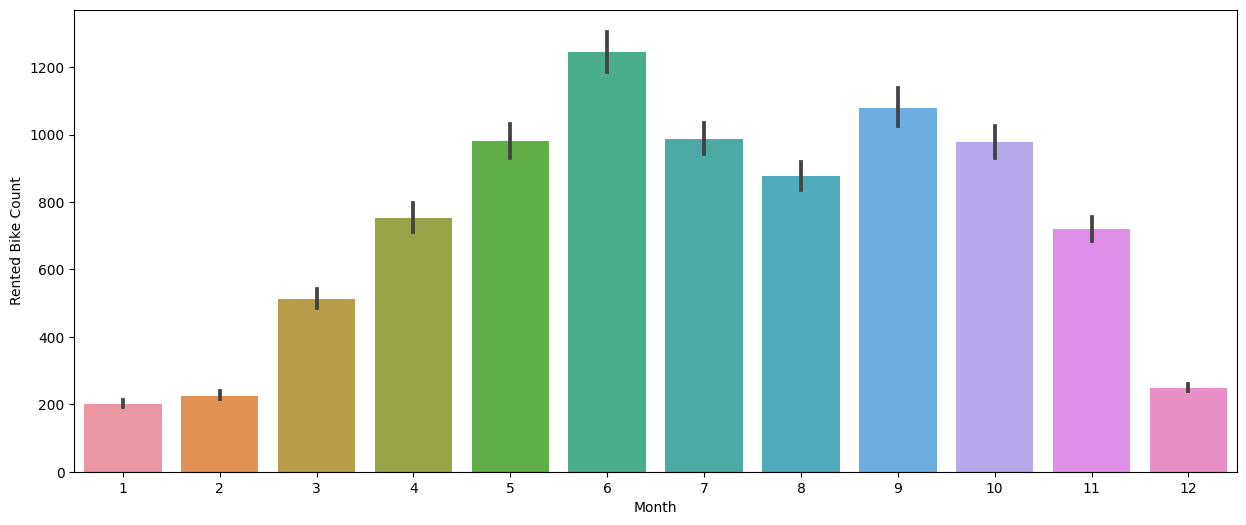

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=df_clean['Month'], y=df_clean['Rented Bike Count'])
plt.show()

В лидерах июнь и сентябрь. Реже всего арендуют в зимние месяцы

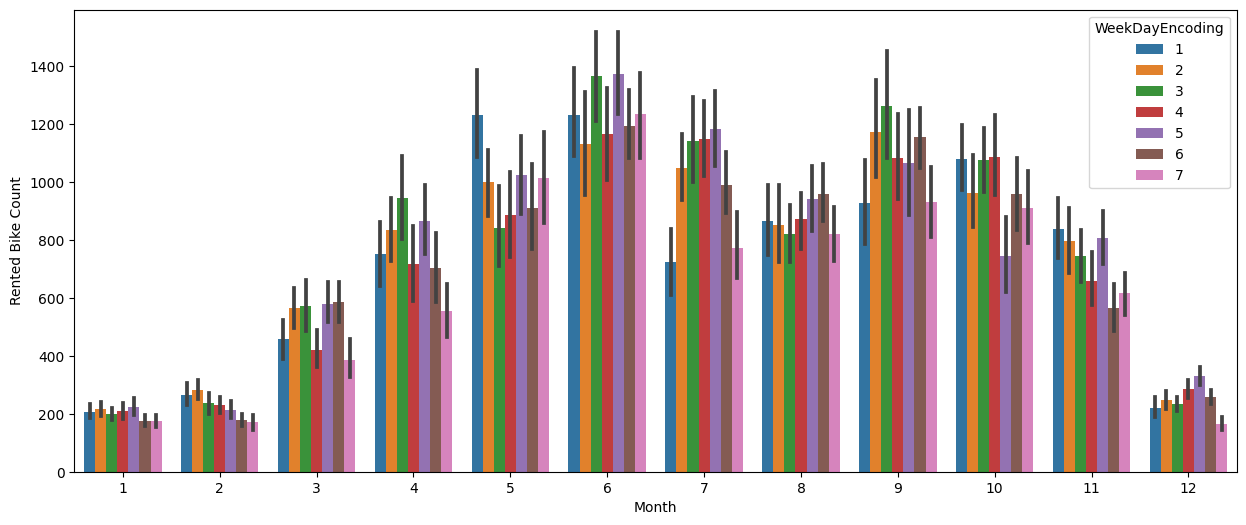

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=df_clean['Month'], y=df_clean['Rented Bike Count'], hue=df_clean['WeekDayEncoding'])
plt.show()

Особо ярких тенденций я не вижу.В популярные месяцы, популярен понедельник и пятница. Воскресенье не популярно почти никогда.

# Предобработка данных

In [ ]:
df_clean.loc[df['Humidity(%)'] == 0]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Month,WeekDay,WeekDayEncoding
4063,2018-05-19,436,7,11.4,0,1.4,2000,4.5,0.46,0.0,0.0,Spring,No Holiday,5,Saturday,6
4106,2018-05-21,262,2,13.9,0,0.9,2000,-2.1,0.00,0.0,0.0,Spring,No Holiday,5,Monday,1
4107,2018-05-21,165,3,13.0,0,0.8,2000,-2.5,0.00,0.0,0.0,Spring,No Holiday,5,Monday,1
4108,2018-05-21,113,4,12.4,0,0.8,2000,-3.4,0.00,0.0,0.0,Spring,No Holiday,5,Monday,1
4109,2018-05-21,200,5,11.9,0,1.3,2000,-2.7,0.00,0.0,0.0,Spring,No Holiday,5,Monday,1
4110,2018-05-21,467,6,11.4,0,0.9,2000,-2.0,0.03,0.0,0.0,Spring,No Holiday,5,Monday,1
4111,2018-05-21,1135,7,12.3,0,0.9,1989,-2.7,0.48,0.0,0.0,Spring,No Holiday,5,Monday,1
4131,2018-05-22,406,3,15.5,0,0.7,1420,10.4,0.00,0.0,0.0,Spring,Holiday,5,Tuesday,2
4132,2018-05-22,248,4,15.6,0,0.5,1502,10.5,0.00,0.0,0.0,Spring,Holiday,5,Tuesday,2
4133,2018-05-22,182,5,15.7,0,0.6,1610,10.6,0.00,0.0,0.0,Spring,Holiday,5,Tuesday,2


Нигде на Земле не зарегистрирована относительная влажность 0%. Плюс, в сторону ошибки регистрации говорит пустой промежуток на графике между 20% и 0%. Поскольку эти дни были рабочие и другие данные для них выглядят обычно, 0 будет заменен на среднее для сезона.

In [ ]:
df_clean.groupby('Seasons')['Humidity(%)'].mean()

Seasons
Autumn    59.044915
Spring    58.758333
Summer    64.981431
Winter    49.744907
Name: Humidity(%), dtype: float64

In [ ]:
df_clean['Humidity(%)'].loc[df_clean['Humidity(%)'] == 0] = 58.78

<ipython-input-551-2cd622d632e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Humidity(%)'].loc[df_clean['Humidity(%)'] == 0] = 58.78


In [ ]:
df_clean.drop(columns=['Date'],inplace=True)

In [ ]:
df_clean.drop(columns=['WeekDay'],inplace=True)

In [ ]:
df_clean

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Month,WeekDayEncoding
0,254,0,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,12,5
1,204,1,-5.5,38.0,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,12,5
2,173,2,-6.0,39.0,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,12,5
3,107,3,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,12,5
4,78,4,-6.0,36.0,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34.0,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,11,5
8756,764,20,3.4,37.0,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,11,5
8757,694,21,2.6,39.0,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,11,5
8758,712,22,2.1,41.0,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,11,5


#Кодировка признаков

Проблемой представлялась кодировка т.н. циклических признаков (день, месяц, час). Если кодировать их OneHot методом, то очень сильно увеличивалась размерность датасета. Если просто закодировать признак в одну колонку это создает неправильные соотношения размерности (23 и 0 часов, 12 и 1 месяц). Я нашла решение, предложенное вот здесь https://www.avanwyk.com/encoding-cyclical-features-for-deep-learning/, где предлагается кодировать данные признаки в виде 2х колонок sin и cos.

In [ ]:
df_clean['hour_sin'] = np.sin(2 * np.pi * df_clean['Hour']/24.0)
df_clean['hour_cos'] = np.cos(2 * np.pi * df_clean['Hour']/24.0)

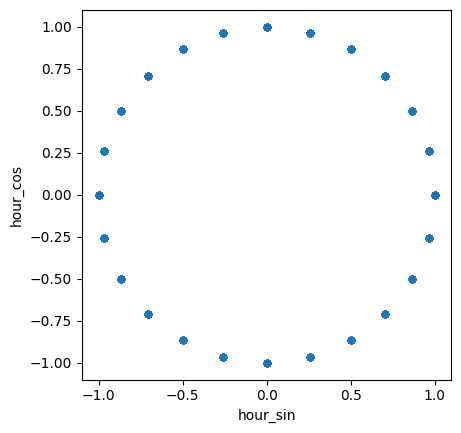

In [ ]:
ax = df_clean.plot.scatter('hour_sin', 'hour_cos').set_aspect('equal')


In [ ]:
df_clean['day_sin'] = np.sin(2 * np.pi * df_clean['WeekDayEncoding']/7)
df_clean['day_cos'] = np.cos(2 * np.pi * df_clean['WeekDayEncoding']/7)

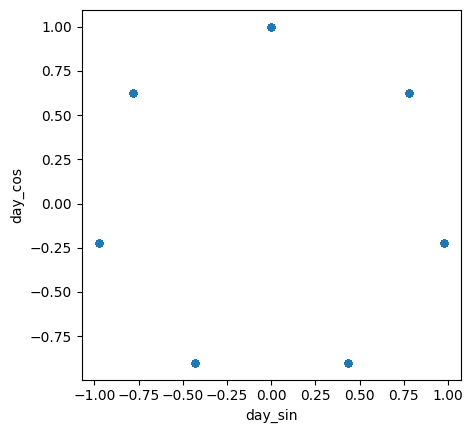

In [ ]:
ax = df_clean.plot.scatter('day_sin', 'day_cos').set_aspect('equal')


In [ ]:
df_clean['Month_sin'] = np.sin(2 * np.pi * df_clean['Month']/12)
df_clean['Month_cos'] = np.cos(2 * np.pi * df_clean['Month']/12)

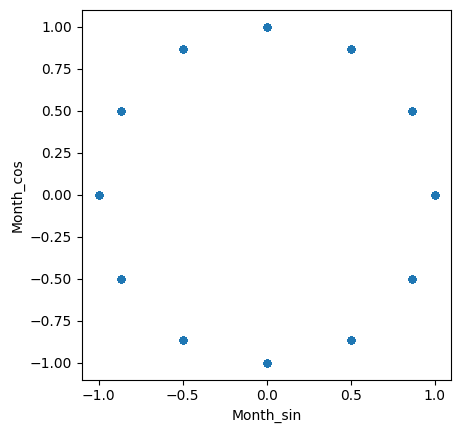

In [ ]:
ax = df_clean.plot.scatter('Month_sin', 'Month_cos').set_aspect('equal')


В итоге добавилось 6 признаков для трех циклических переменных.

In [ ]:
df_clean.drop(columns=['Month', 'WeekDayEncoding', 'Hour'],inplace=True)

In [ ]:
df_clean

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,hour_sin,hour_cos,day_sin,day_cos,Month_sin,Month_cos
0,254,-5.2,37.0,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,0.000000,1.000000,-0.974928,-0.222521,-2.449294e-16,1.000000
1,204,-5.5,38.0,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,0.258819,0.965926,-0.974928,-0.222521,-2.449294e-16,1.000000
2,173,-6.0,39.0,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,0.500000,0.866025,-0.974928,-0.222521,-2.449294e-16,1.000000
3,107,-6.2,40.0,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,0.707107,0.707107,-0.974928,-0.222521,-2.449294e-16,1.000000
4,78,-6.0,36.0,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,0.866025,0.500000,-0.974928,-0.222521,-2.449294e-16,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34.0,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,-0.965926,0.258819,-0.974928,-0.222521,-5.000000e-01,0.866025
8756,764,3.4,37.0,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,-0.866025,0.500000,-0.974928,-0.222521,-5.000000e-01,0.866025
8757,694,2.6,39.0,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,-0.707107,0.707107,-0.974928,-0.222521,-5.000000e-01,0.866025
8758,712,2.1,41.0,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,-0.500000,0.866025,-0.974928,-0.222521,-5.000000e-01,0.866025


In [ ]:
# осталось две колонки с сезоном и выходными, для них используем метод get_dummies()
df_clean = pd.get_dummies(df_clean, columns=['Seasons', 'Holiday'], drop_first=True)
df_clean

KeyError: ignored

# Бейзлайн модель регрессии

Поскольку задачей стоито предсказать число велосипедов, для этого используем модель линейно-линейной регрессии.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_clean.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'hour_sin',
       'hour_cos', 'day_sin', 'day_cos', 'Month_sin', 'Month_cos',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday'],
      dtype='object')

In [ ]:
X = df_clean.drop(['Rented Bike Count'], axis=1)
# X = df_clean[['Hour',
#               'Temperature(°C)',
#               'Humidity(%)',
#               'Wind speed (m/s)',
#               'Visibility (10m)',
#               'Solar Radiation (MJ/m2)',
#               'Rainfall(mm)',
#               'Seasons_Spring',
#               'Seasons_Winter',
#               'Holiday_No Holiday']]
y = df_clean['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


X_train

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),hour_sin,hour_cos,day_sin,day_cos,Month_sin,Month_cos,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday
1164,2.5,72.0,2.4,256,-2.0,0.00,0.0,0.0,1.224647e-16,-1.000000,-4.338837e-01,-0.900969,5.000000e-01,0.866025,0,0,1,1
4803,19.9,69.0,1.4,1179,14.0,0.00,0.0,0.0,7.071068e-01,0.707107,9.749279e-01,-0.222521,1.224647e-16,-1.000000,0,1,0,1
1450,-7.5,42.0,0.9,1705,-18.2,0.55,0.0,0.0,5.000000e-01,-0.866025,9.749279e-01,-0.222521,5.000000e-01,0.866025,0,0,1,1
3881,18.9,45.0,2.6,1084,6.6,0.80,0.0,0.0,-9.659258e-01,-0.258819,-9.749279e-01,-0.222521,5.000000e-01,-0.866025,1,0,0,1
7447,14.3,89.0,0.6,1165,12.5,0.03,0.0,0.0,9.659258e-01,-0.258819,-2.449294e-16,1.000000,-8.660254e-01,0.500000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5782,30.4,45.0,1.6,2000,17.1,0.00,0.0,0.0,-5.000000e-01,0.866025,-2.449294e-16,1.000000,-5.000000e-01,-0.866025,0,1,0,1
5239,19.6,57.0,1.6,2000,10.8,0.42,0.0,0.0,9.659258e-01,-0.258819,-7.818315e-01,0.623490,-5.000000e-01,-0.866025,0,1,0,1
5438,32.4,50.0,2.0,1735,20.6,3.13,0.0,0.0,-5.000000e-01,-0.866025,-2.449294e-16,1.000000,-5.000000e-01,-0.866025,0,1,0,1
860,-3.4,51.0,1.1,1391,-12.1,0.00,0.0,0.0,-8.660254e-01,0.500000,-9.749279e-01,-0.222521,5.000000e-01,0.866025,0,0,1,1


##Feature scalling

In [ ]:
X_train.columns

Index(['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'hour_sin',
       'hour_cos', 'day_sin', 'day_cos', 'Month_sin', 'Month_cos',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday'],
      dtype='object')

In [ ]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# num_cols = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
#        'Visibility (10m)', 'Dew point temperature(°C)',
#        'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Month',
#        'WeekDayEncoding']

num_cols_selected = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)']


for i in num_cols_selected:
  scaler = StandardScaler().fit(X_train_scaled[[i]])
  X_train_scaled[i] = scaler.transform(X_train_scaled[[i]])
  X_test_scaled[i] = scaler.transform(X_test_scaled[[i]])

X_train_scaled

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),hour_sin,hour_cos,day_sin,day_cos,Month_sin,Month_cos,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday
1164,-0.856776,0.663168,0.649612,-1.916657,-2.0,-0.654962,-0.135695,0.0,1.224647e-16,-1.000000,-4.338837e-01,-0.900969,5.000000e-01,0.866025,0,0,1,1
4803,0.591060,0.515991,-0.317993,-0.407986,14.0,-0.654962,-0.135695,0.0,7.071068e-01,0.707107,9.749279e-01,-0.222521,1.224647e-16,-1.000000,0,1,0,1
1450,-1.688866,-0.808605,-0.801795,0.451776,-18.2,-0.019816,-0.135695,0.0,5.000000e-01,-0.866025,9.749279e-01,-0.222521,5.000000e-01,0.866025,0,0,1,1
3881,0.507851,-0.661427,0.843133,-0.563267,6.6,0.268887,-0.135695,0.0,-9.659258e-01,-0.258819,-9.749279e-01,-0.222521,5.000000e-01,-0.866025,1,0,0,1
7447,0.125090,1.497173,-1.092077,-0.430870,12.5,-0.620318,-0.135695,0.0,9.659258e-01,-0.258819,-2.449294e-16,1.000000,-8.660254e-01,0.500000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5782,1.464755,-0.661427,-0.124472,0.933963,17.1,-0.654962,-0.135695,0.0,-5.000000e-01,0.866025,-2.449294e-16,1.000000,-5.000000e-01,-0.866025,0,1,0,1
5239,0.566098,-0.072718,-0.124472,0.933963,10.8,-0.169942,-0.135695,0.0,9.659258e-01,-0.258819,-7.818315e-01,0.623490,-5.000000e-01,-0.866025,0,1,0,1
5438,1.631173,-0.416132,0.262570,0.500812,20.6,2.959597,-0.135695,0.0,-5.000000e-01,-0.866025,-2.449294e-16,1.000000,-5.000000e-01,-0.866025,0,1,0,1
860,-1.347709,-0.367073,-0.608274,-0.061466,-12.1,-0.654962,-0.135695,0.0,-8.660254e-01,0.500000,-9.749279e-01,-0.222521,5.000000e-01,0.866025,0,0,1,1


In [ ]:
model_log = pd.DataFrame(columns=['Model','r2_train', 'r2_test', 'adjusted_r2_test', 'mse_train', 'mse_test'])
# журнал для запоминания и сравнивания результатов моделей

##linear regression

In [ ]:
from sklearn import linear_model
from sklearn import metrics

In [ ]:
X_train_scaled

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),hour_sin,hour_cos,day_sin,day_cos,Month_sin,Month_cos,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday
1164,-0.856776,0.663168,0.649612,-1.916657,-2.0,-0.654962,-0.135695,0.0,1.224647e-16,-1.000000,-4.338837e-01,-0.900969,5.000000e-01,0.866025,0,0,1,1
4803,0.591060,0.515991,-0.317993,-0.407986,14.0,-0.654962,-0.135695,0.0,7.071068e-01,0.707107,9.749279e-01,-0.222521,1.224647e-16,-1.000000,0,1,0,1
1450,-1.688866,-0.808605,-0.801795,0.451776,-18.2,-0.019816,-0.135695,0.0,5.000000e-01,-0.866025,9.749279e-01,-0.222521,5.000000e-01,0.866025,0,0,1,1
3881,0.507851,-0.661427,0.843133,-0.563267,6.6,0.268887,-0.135695,0.0,-9.659258e-01,-0.258819,-9.749279e-01,-0.222521,5.000000e-01,-0.866025,1,0,0,1
7447,0.125090,1.497173,-1.092077,-0.430870,12.5,-0.620318,-0.135695,0.0,9.659258e-01,-0.258819,-2.449294e-16,1.000000,-8.660254e-01,0.500000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5782,1.464755,-0.661427,-0.124472,0.933963,17.1,-0.654962,-0.135695,0.0,-5.000000e-01,0.866025,-2.449294e-16,1.000000,-5.000000e-01,-0.866025,0,1,0,1
5239,0.566098,-0.072718,-0.124472,0.933963,10.8,-0.169942,-0.135695,0.0,9.659258e-01,-0.258819,-7.818315e-01,0.623490,-5.000000e-01,-0.866025,0,1,0,1
5438,1.631173,-0.416132,0.262570,0.500812,20.6,2.959597,-0.135695,0.0,-5.000000e-01,-0.866025,-2.449294e-16,1.000000,-5.000000e-01,-0.866025,0,1,0,1
860,-1.347709,-0.367073,-0.608274,-0.061466,-12.1,-0.654962,-0.135695,0.0,-8.660254e-01,0.500000,-9.749279e-01,-0.222521,5.000000e-01,0.866025,0,0,1,1


In [ ]:
lr_model = linear_model.LinearRegression()

lr_model.fit(X_train_scaled, y_train)

# Делаем предсказание для тренировочной выборки
y_train_predict = lr_model.predict(X_train_scaled)

# Делаем предсказание для тестовой выборки
y_test_predict = lr_model.predict(X_test_scaled)


In [ ]:
def model_metrics(y_tr, y_tr_predict, y_ts, y_ts_pred, X_1, model_name):
  r2_train = metrics.r2_score(y_tr, y_tr_predict)
  r2_test = metrics.r2_score(y_ts, y_ts_pred)
  adjusted_r2_test = 1 - (1 - r2_test)*(len(y) - 1)/(len(y)-X.shape[1]-1)
  mse_train = metrics.mean_squared_error(y_tr, y_tr_predict, squared=False)
  mse_test = metrics.mean_squared_error(y_ts, y_ts_pred, squared=False)
  model_log.loc[len(model_log)] = [model_name, r2_train, r2_test, adjusted_r2_test, mse_train, mse_test]
  return r2_train, r2_test, adjusted_r2_test, mse_train, mse_test

#функция для расчета метрик модели и внесения в лог

In [ ]:
model_metrics(y_train, y_train_predict, y_test, y_test_predict, X, model_name='LinearRegression_with_all_features')

(0.5649380960579176,
 0.5712302154858685,
 0.5703164271693573,
 426.64507883029535,
 411.5056194062206)

In [ ]:
model_log

,Model,r2_train,r2_test,adjusted_r2_test,mse_train,mse_test
0,LinearRegression_with_all_features,0.564938,0.57123,0.570316,426.645079,411.505619


Пока метрики слабые.

####log y

In [ ]:
from scipy import stats
from scipy.stats import norm

In [ ]:
X = df_clean.drop(['Rented Bike Count'], axis=1)

y = df_clean['Rented Bike Count']

<ipython-input-578-e8ef735181c3>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_y, fit=norm);



 mu = 729.16 and sigma = 642.31



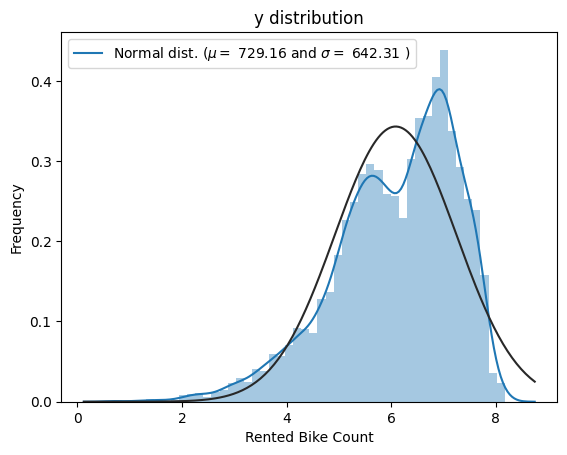

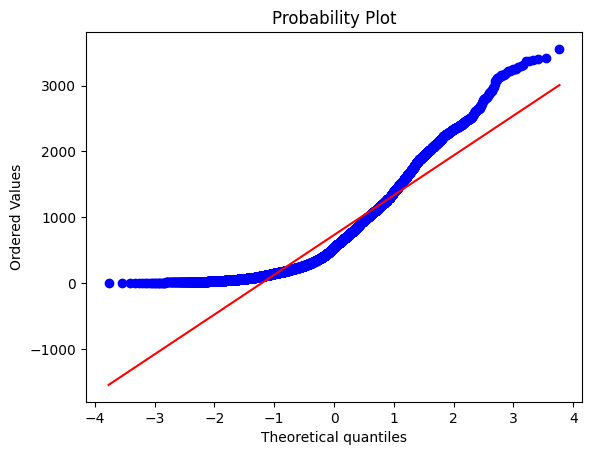

In [ ]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
log_y = y.copy()
log_y = np.log(log_y)

#Check the new distribution
sns.distplot(log_y, fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(y, plot=plt)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, log_y, random_state=42)

In [ ]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

num_cols = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


for i in num_cols:
  scaler = StandardScaler().fit(X_train_scaled[[i]])
  X_train_scaled[i] = scaler.transform(X_train_scaled[[i]])
  X_test_scaled[i] = scaler.transform(X_test_scaled[[i]])

X_train_scaled

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),hour_sin,hour_cos,day_sin,day_cos,Month_sin,Month_cos,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday
1164,-0.856776,0.663168,0.649612,-1.916657,-0.457970,-0.654962,-0.135695,-0.175249,1.224647e-16,-1.000000,-4.338837e-01,-0.900969,5.000000e-01,0.866025,0,0,1,1
4803,0.591060,0.515991,-0.317993,-0.407986,0.758877,-0.654962,-0.135695,-0.175249,7.071068e-01,0.707107,9.749279e-01,-0.222521,1.224647e-16,-1.000000,0,1,0,1
1450,-1.688866,-0.808605,-0.801795,0.451776,-1.690027,-0.019816,-0.135695,-0.175249,5.000000e-01,-0.866025,9.749279e-01,-0.222521,5.000000e-01,0.866025,0,0,1,1
3881,0.507851,-0.661427,0.843133,-0.563267,0.196085,0.268887,-0.135695,-0.175249,-9.659258e-01,-0.258819,-9.749279e-01,-0.222521,5.000000e-01,-0.866025,1,0,0,1
7447,0.125090,1.497173,-1.092077,-0.430870,0.644798,-0.620318,-0.135695,-0.175249,9.659258e-01,-0.258819,-2.449294e-16,1.000000,-8.660254e-01,0.500000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5782,1.464755,-0.661427,-0.124472,0.933963,0.994641,-0.654962,-0.135695,-0.175249,-5.000000e-01,0.866025,-2.449294e-16,1.000000,-5.000000e-01,-0.866025,0,1,0,1
5239,0.566098,-0.072718,-0.124472,0.933963,0.515508,-0.169942,-0.135695,-0.175249,9.659258e-01,-0.258819,-7.818315e-01,0.623490,-5.000000e-01,-0.866025,0,1,0,1
5438,1.631173,-0.416132,0.262570,0.500812,1.260826,2.959597,-0.135695,-0.175249,-5.000000e-01,-0.866025,-2.449294e-16,1.000000,-5.000000e-01,-0.866025,0,1,0,1
860,-1.347709,-0.367073,-0.608274,-0.061466,-1.226104,-0.654962,-0.135695,-0.175249,-8.660254e-01,0.500000,-9.749279e-01,-0.222521,5.000000e-01,0.866025,0,0,1,1


In [ ]:
lr_model = linear_model.LinearRegression()

lr_model.fit(X_train_scaled, y_train)

# Делаем предсказание для тренировочной выборки
y_train_predict = np.exp(lr_model.predict(X_train_scaled))

# Делаем предсказание для тестовой выборки
y_test_predict = np.exp(lr_model.predict(X_test_scaled))

y_test = np.exp(y_test)
y_train = np.exp(y_train)

In [ ]:
model_metrics(y_train, y_train_predict, y_test, y_test_predict, X, model_name='LinearRegression_with_log_y')

(0.5475244469922249,
 0.5535631563890575,
 0.5526117162771707,
 435.0996884242165,
 419.89789568922737)

In [ ]:
model_log

,Model,r2_train,r2_test,adjusted_r2_test,mse_train,mse_test
0,LinearRegression_with_all_features,0.564938,0.571230,0.570316,426.645079,411.505619
1,LinearRegression_with_log_y,0.547524,0.553563,0.552612,435.099688,419.897896


##polynomial regression

In [ ]:
X = df_clean.drop(['Rented Bike Count'], axis=1)
y = df_clean['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

num_cols_selected = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)']


for i in num_cols_selected:
  scaler = StandardScaler().fit(X_train_scaled[[i]])
  X_train_scaled[i] = scaler.transform(X_train_scaled[[i]])
  X_test_scaled[i] = scaler.transform(X_test_scaled[[i]])


In [ ]:
from sklearn import preprocessing

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)

X_train_poly = poly.transform(X_train_scaled)

X_test_poly = poly.transform(X_test_scaled)

# Выводим результирующие размерности таблиц
print(X_train_poly.shape)
print(X_test_poly.shape)

(6348, 189)
(2117, 189)


In [ ]:
lr_model_poly = linear_model.LinearRegression()

lr_model_poly.fit(X_train_poly, y_train)

y_train_predict_poly = lr_model_poly.predict(X_train_poly)
y_test_predict_poly = lr_model_poly.predict(X_test_poly)

In [ ]:
model_metrics(y_train, y_train_predict_poly, y_test, y_test_predict_poly, X, model_name='LinearRegression_poly')

(0.8098939433309638,
 0.7903136791918367,
 0.7898667985649663,
 282.02602692723457,
 287.77213144281836)

При проведении регрессии с полиномиально сгенерированными признаками метрики стали лучше, чем для бейзлайн модели регрессииб но есть признаки переобучения, можно попробовать их убрать при помощи регуляризации

##L1 regularization

In [ ]:
# Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(alpha=1)

lasso_lr_poly.fit(X_train_poly, y_train)

# Делаем предсказание для тренировочной выборки
y_train_predict = lasso_lr_poly.predict(X_train_poly)

# Делаем предсказание для тестовой выборки
y_test_predict = lasso_lr_poly.predict(X_test_poly)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.619e+07, tolerance: 2.656e+05
  model = cd_fast.enet_coordinate_descent(


In [ ]:
model_metrics(y_train, y_train_predict, y_test, y_test_predict, X, model_name='LinearRegression_L1_0.1')

(0.7932615502736802,
 0.7990172211184086,
 0.7985888893613794,
 294.1046155534168,
 281.7364947997292)

#ForestRegrression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X = df_clean.drop(['Rented Bike Count'], axis=1)
y = df_clean['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [ ]:
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=15)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=15)

In [ ]:
y_train_pred = rf.predict(X_train)

In [ ]:
y_test_pred = rf.predict(X_test)

In [ ]:
model_metrics(y_train, y_train_pred, y_test, y_test_pred, X, model_name='RandomForestRegressor_100_5')

(0.804262764938053,
 0.7875327133251694,
 0.7870799059417752,
 283.2352521777735,
 298.9637622403296)

In [ ]:
model_log

,Model,r2_train,r2_test,adjusted_r2_test,mse_train,mse_test
0,LinearRegression_with_all_features,0.564938,0.571230,0.570316,426.645079,411.505619
1,LinearRegression_poly,0.809894,0.790314,0.789867,282.026027,287.772131
2,RandomForestRegressor_100_5,0.804263,0.787533,0.787080,283.235252,298.963762


##hyperparameter tuning using HyperOpt

In [ ]:
from sklearn.model_selection import cross_val_score
import hyperopt
from hyperopt import hp, fmin, tpe, Trials
from hyperopt import space_eval
# fmin - основная функция, она будет минимизировать наш функционал
# tpe - алгоритм оптимизации
# hp - включает набор методов для объявления пространства поиска гиперпараметров
# trails - используется для логирования результатов

In [ ]:
space= {'n_estimators': hp.quniform('n_estimators', 90, 200, 10),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 20, 1),
    'max_features': hp.choice('max_features', ['sqrt', 'log2']),
    'max_depth': hp.quniform('max_depth', 1, 15, 1),
    'criterion': hp.choice('criterion', ['squared_error', 'absolute_error'])
}

In [ ]:
random_state = 42
def hyperopt_rf(params, cv=5, X=X_train, y=y_train, random_state=random_state):
    # функция получает комбинацию гиперпараметров в "params"
    params = {'min_samples_leaf': int(params['min_samples_leaf']),
              'max_features': params['max_features'],
             'max_depth': int(params['max_depth']),
             'criterion': params['criterion'],
              }

    # используем эту комбинацию для построения модели
    model = RandomForestRegressor(**params, random_state=random_state)

    # обучаем модель
    model.fit(X, y)

    # обучать модель можно также с помощью кросс-валидации
    # применим  cross validation с тем же количеством фолдов
    score = cross_val_score(model, X, y, cv=cv, scoring="r2", n_jobs=-1).mean()

    # метрику необходимо минимизировать, поэтому ставим знак минус
    return -score

In [ ]:
trials = Trials() # используется для логирования результатов

best=fmin(hyperopt_rf, # наша функция
          space=space, # пространство гиперпараметров
          algo=tpe.suggest, # алгоритм оптимизации, установлен по умолчанию, задавать необязательно
          max_evals=15, # максимальное количество итераций
          trials=trials, # логирование результатов
          rstate=np.random.default_rng(random_state)# фиксируем для повторяемости результата
         )

print(f"Наилучшие значения гиперпараметров {best}")

100%|██████████| 15/15 [06:43<00:00, 26.88s/trial, best loss: -0.8924085818082966]
Наилучшие значения гиперпараметров {'criterion': 0, 'max_depth': 14.0, 'max_features': 1, 'min_samples_leaf': 2.0, 'n_estimators': 90.0}


In [ ]:
rf = RandomForestRegressor(n_estimators=90, criterion ='squared_error', max_depth=14, max_features=3, min_samples_leaf=2)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=14, max_features=3, min_samples_leaf=2,
                      n_estimators=90)

In [ ]:
y_train_pred = rf.predict(X_train)

In [ ]:
y_test_pred = rf.predict(X_test)

In [ ]:
model_metrics(y_train, y_train_pred, y_test, y_test_pred, X, model_name='RandomForestRegressor_tuned_mf3')

(0.9527240950038344,
 0.884937242388959,
 0.8846920222093475,
 139.19720236286437,
 220.0087245767581)

In [ ]:
model_log

,Model,r2_train,r2_test,adjusted_r2_test,mse_train,mse_test
0,LinearRegression_with_all_features,0.564938,0.571230,0.570316,426.645079,411.505619
1,LinearRegression_poly,0.809894,0.790314,0.789867,282.026027,287.772131
2,RandomForestRegressor_100_5,0.804263,0.787533,0.787080,283.235252,298.963762
3,RandomForestRegressor_tuned,0.899188,0.820336,0.819953,203.266861,274.917737
4,RandomForestRegressor_tuned_mf3,0.952724,0.884937,0.884692,139.197202,220.008725


После подбора параметров с помощью HyperOpt, метрики стали на трейне чуть лучше, на тесте чуть хуже. Модель переобучается.

#GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
X = df_clean.drop(['Rented Bike Count'], axis=1)
y = df_clean['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [ ]:
gbr_params = {'n_estimators': 200,
          'max_depth': 5,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'squared_error'}

In [ ]:
gbr = GradientBoostingRegressor(**gbr_params)


In [ ]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, min_samples_split=5,
                          n_estimators=200)

In [ ]:
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

In [ ]:
model_metrics(y_train, y_train_pred, y_test, y_test_pred, X, model_name='GradientBoostingRegressor_baseline_200')

(0.844455379854825,
 0.8211729074629183,
 0.8207917936024319,
 252.48645136106023,
 274.27686201904487)

In [ ]:
model_log

,Model,r2_train,r2_test,adjusted_r2_test,mse_train,mse_test
0,LinearRegression_with_all_features,0.564938,0.571230,0.570316,426.645079,411.505619
1,LinearRegression_poly,0.809894,0.790314,0.789867,282.026027,287.772131
2,RandomForestRegressor_100_5,0.804263,0.787533,0.787080,283.235252,298.963762
3,RandomForestRegressor_tuned,0.899188,0.820336,0.819953,203.266861,274.917737
4,RandomForestRegressor_tuned_mf3,0.952724,0.884937,0.884692,139.197202,220.008725
5,GradientBoostingRegressor_baseline_200,0.844455,0.821173,0.820792,252.486451,274.276862


##Hyperparameter tuning


In [ ]:
from sklearn.model_selection import GridSearchCV
import sklearn

In [ ]:
# сначала определяем оптимальное количество n_estimators
param_test1 = {'n_estimators':range(20,81,10)}

gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1,
                                                               min_samples_split=50,
                                                               min_samples_leaf=5,
                                                               max_depth=5,
                                                               max_features='sqrt',
                                                               subsample=0.8,
                                                               random_state=10),
param_grid = param_test1, scoring='r2',n_jobs=4, cv=5)
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=5,
                                                 max_features='sqrt',
                                                 min_samples_leaf=5,
                                                 min_samples_split=50,
                                                 random_state=10,
                                                 subsample=0.8),
             n_jobs=4, param_grid={'n_estimators': range(20, 81, 10)},
             scoring='r2')

In [ ]:
gsearch1.best_params_

{'n_estimators': 80}

In [ ]:
gsearch1.best_score_

0.8926955695909147

In [ ]:
#tuning max_depth and min_samples_split поскольку они оказывают максимальное влиние на модель

param_test2 = {'max_depth':range(5,15,2), 'min_samples_split':range(5,10)}
gsearch2 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1,
                                                              n_estimators=80,
                                                              max_features='sqrt',
                                                              subsample=0.8,
                                                              random_state=10),
param_grid = param_test2, scoring='r2',n_jobs=4, cv=5)
gsearch2.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_features='sqrt',
                                                 n_estimators=80,
                                                 random_state=10,
                                                 subsample=0.8),
             n_jobs=4,
             param_grid={'max_depth': range(5, 15, 2),
                         'min_samples_split': range(5, 10)},
             scoring='r2')

In [ ]:
gsearch2.best_params_

{'max_depth': 9, 'min_samples_split': 7}

In [ ]:
gsearch2.best_score_

0.9261753576024837

In [ ]:
gbr_params_tuned = {'n_estimators': 80,
          'max_depth': 9,
          'min_samples_split': 7,
          'learning_rate': 0.1,
          'loss': 'squared_error'}

In [ ]:
gbr_tuned = GradientBoostingRegressor(**gbr_params_tuned, random_state=10)


In [ ]:
gbr_tuned.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=9, min_samples_split=7, n_estimators=80,
                          random_state=10)

In [ ]:
y_train_pred = gbr_tuned.predict(X_train)
y_test_pred = gbr_tuned.predict(X_test)

In [ ]:
model_metrics(y_train, y_train_pred, y_test, y_test_pred, X, model_name='GradientBoostingRegressor_tuned')

(0.9969649836911225,
 0.9430775131043039,
 0.9429562006766313,
 35.26883348999642,
 154.74422389412638)

In [ ]:
model_log

,Model,r2_train,r2_test,adjusted_r2_test,mse_train,mse_test
0,LinearRegression_with_all_features,0.564938,0.571230,0.570316,426.645079,411.505619
1,LinearRegression_poly,0.809894,0.790314,0.789867,282.026027,287.772131
2,RandomForestRegressor_100_5,0.804263,0.787533,0.787080,283.235252,298.963762
3,RandomForestRegressor_tuned,0.899188,0.820336,0.819953,203.266861,274.917737
4,RandomForestRegressor_tuned_mf3,0.952724,0.884937,0.884692,139.197202,220.008725
5,GradientBoostingRegressor_baseline_200,0.844455,0.821173,0.820792,252.486451,274.276862
6,GradientBoostingRegressor_tuned,0.996965,0.943078,0.942956,35.268833,154.744224


#XGBoost

In [ ]:
import xgboost as xgb


In [ ]:
X = df_clean.drop(['Rented Bike Count'], axis=1)
y = df_clean['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [ ]:
xgb_model = xgb.XGBRegressor(booster='gbtree',  random_state=15)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=15, ...)

In [ ]:
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

In [ ]:
model_metrics(y_train, y_train_pred, y_test, y_test_pred, X, model_name='XGBRegressor_baseline')

(0.9898631303944331,
 0.9409748537466232,
 0.9408490601600069,
 64.4558754073412,
 157.576354960731)

In [ ]:
model_log

,Model,r2_train,r2_test,adjusted_r2_test,mse_train,mse_test
0,LinearRegression_with_all_features,0.564938,0.571230,0.570316,426.645079,411.505619
1,LinearRegression_poly,0.809894,0.790314,0.789867,282.026027,287.772131
2,RandomForestRegressor_100_5,0.804263,0.787533,0.787080,283.235252,298.963762
3,RandomForestRegressor_tuned,0.899188,0.820336,0.819953,203.266861,274.917737
4,RandomForestRegressor_tuned_mf3,0.952724,0.884937,0.884692,139.197202,220.008725
5,GradientBoostingRegressor_baseline_200,0.844455,0.821173,0.820792,252.486451,274.276862
6,GradientBoostingRegressor_tuned,0.996965,0.943078,0.942956,35.268833,154.744224
7,XGBRegressor_baseline,0.989863,0.940975,0.940849,64.455875,157.576355


Модель явно переобучилась, но все равно метрики намного лучше, чем у других. Думаю, следует сосредоточится на настройке и валидации данной модели

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

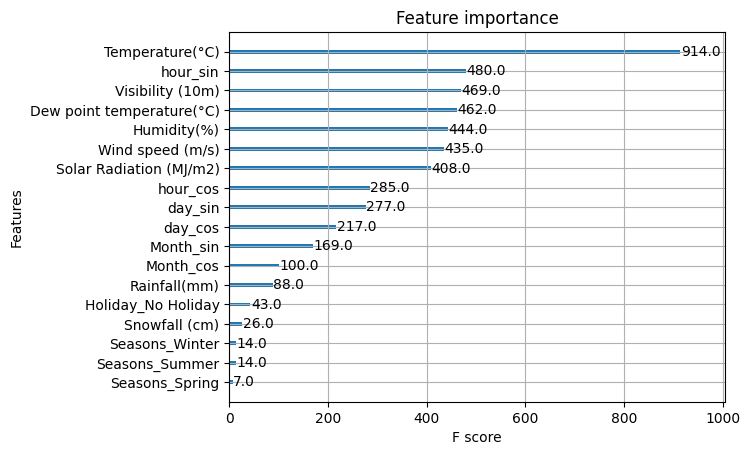

In [ ]:
from xgboost.plotting import plot_importance
plot_importance(xgb_model)

In [ ]:
X = df_clean.drop(['Rented Bike Count', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter'], axis=1)
y = df_clean['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [ ]:
xgb_model = xgb.XGBRegressor(booster='gbtree',  random_state=15)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=15, ...)

In [ ]:
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

In [ ]:
model_metrics(y_train, y_train_pred, y_test, y_test_pred, X, model_name='XGBRegressor_features_selected')

(0.9894126808471803,
 0.94122203908859,
 0.9411176871636674,
 65.87241468035901,
 157.2460598870162)

In [ ]:
model_log

,Model,r2_train,r2_test,adjusted_r2_test,mse_train,mse_test
0,LinearRegression_with_all_features,0.564938,0.571230,0.570316,426.645079,411.505619
1,LinearRegression_poly,0.809894,0.790314,0.789867,282.026027,287.772131
2,RandomForestRegressor_100_5,0.804263,0.787533,0.787080,283.235252,298.963762
3,RandomForestRegressor_tuned,0.899188,0.820336,0.819953,203.266861,274.917737
4,RandomForestRegressor_tuned_mf3,0.952724,0.884937,0.884692,139.197202,220.008725
5,GradientBoostingRegressor_baseline_200,0.844455,0.821173,0.820792,252.486451,274.276862
6,GradientBoostingRegressor_tuned,0.996965,0.943078,0.942956,35.268833,154.744224
7,XGBRegressor_baseline,0.989863,0.940975,0.940849,64.455875,157.576355
8,XGBRegressor_features_selected,0.989413,0.941222,0.941118,65.872415,157.246060


Модель стала чуть лучше после того, как убрали все сезоны. У месяцев важность намного больше. Если убрать снегопад, метрики снижаются.

Text(0.5, 1.0, 'Actual Rented Bike Count vs Rented Bike Count')

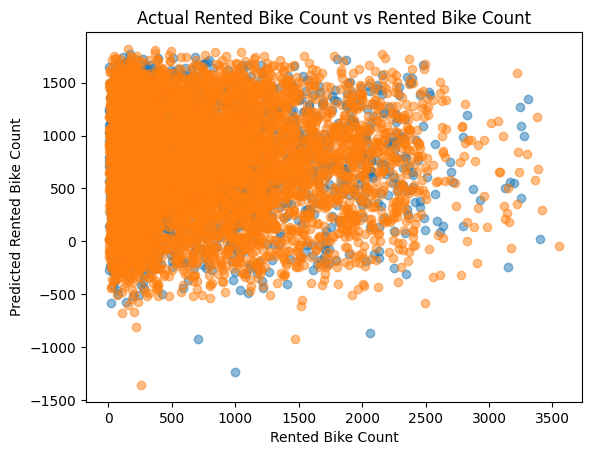

In [ ]:
plt.scatter(y_test, y_test_predict, alpha =0.5)
plt.scatter(y_train, y_train_predict, alpha = 0.5)

plt.xlabel("Rented Bike Count")
plt.ylabel("Predicted Rented Bike Count")
plt.title("Actual Rented Bike Count vs Rented Bike Count")
#  фактические и прогнозируемые показатели расположены весьма близко

## XGBRegressor Hyperparameter tuning

In [ ]:
from xgboost.sklearn import XGBRegressor

In [ ]:
xgb1 = XGBRegressor(learning_rate =0.1,
                    n_estimators=60,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective= 'reg:squarederror',
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27)
xgb1.fit(X_train, y_train)

In [ ]:
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

In [ ]:
model_metrics(y_train, y_train_pred, y_test, y_test_pred, X, model_name='XGBRegressor')

#Feature selection

In [ ]:
features = X.columns

In [ ]:
features

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

TOP_FEATURES = 15

forest = ExtraTreesRegressor(n_estimators=250, max_depth=5, random_state=1)
forest.fit(X, y)

importances = forest.feature_importances_
list_imp = []

for ind, fea in zip(features, importances):
  list_imp.append((ind, fea))
list_imp.sort(key=lambda x: x[1], reverse=True)
list_imp
#отсортированный список важности признаков

#Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline


In [ ]:
X = df_clean.drop(['Rented Bike Count', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter'], axis=1)
y = df_clean['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [ ]:
make_pipeline(StandardScaler(), RandomForestRegressor())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [ ]:
preprocessor = make_column_transformer(
    (make_pipeline(SimpleImputer(strategy='median'), StandardScaler()), ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)']),)

rf_pipeline = make_pipeline(preprocessor, RandomForestRegressor())
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Temperature(°C)',
                                                   'Humidity(%)',
                                                   'Wind speed (m/s)',
                                                   'Visibility (10m)',
                                                   'Solar Radiation (MJ/m2)',
                                                   'Rainfall(mm)'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [ ]:
y_train_pred = rf_pipeline.predict(X_train)
y_test_pred = rf_pipeline.predict(X_test)

In [ ]:
model_metrics(y_train, y_train_pred, y_test, y_test_pred, X, model_name='Pipeline_Rand_Forest')

(0.9521994197502512,
 0.666387980062515,
 0.6657956992838356,
 139.96748703931695,
 374.622069909317)

#Выводы

In [ ]:
model_log

,Model,r2_train,r2_test,adjusted_r2_test,mse_train,mse_test
0,LinearRegression_with_all_features,0.564938,0.571230,0.570316,426.645079,411.505619
1,LinearRegression_poly,0.809894,0.790314,0.789867,282.026027,287.772131
2,RandomForestRegressor_100_5,0.804263,0.787533,0.787080,283.235252,298.963762
3,RandomForestRegressor_tuned,0.899188,0.820336,0.819953,203.266861,274.917737
4,RandomForestRegressor_tuned_mf3,0.952724,0.884937,0.884692,139.197202,220.008725
5,GradientBoostingRegressor_baseline_200,0.844455,0.821173,0.820792,252.486451,274.276862
6,GradientBoostingRegressor_tuned,0.996965,0.943078,0.942956,35.268833,154.744224
7,XGBRegressor_baseline,0.989863,0.940975,0.940849,64.455875,157.576355
8,XGBRegressor_features_selected,0.989413,0.941222,0.941118,65.872415,157.246060
9,Pipeline_Rand_Forest,0.952199,0.666388,0.665796,139.967487,374.622070


<Axes: xlabel='adjusted_r2_test', ylabel='Model'>

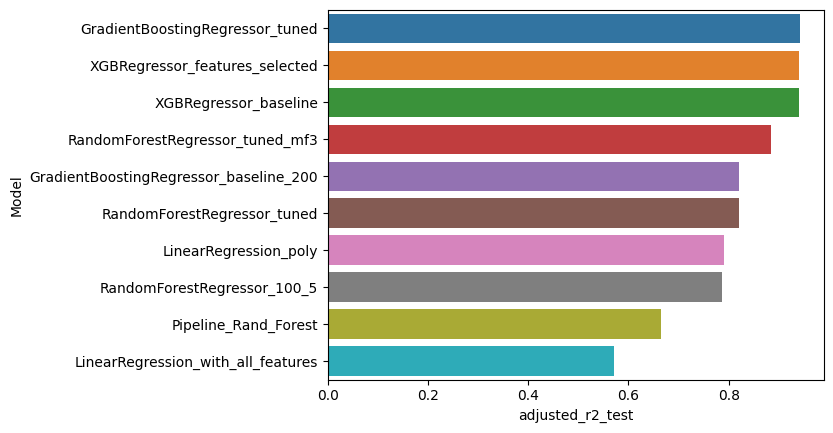

In [ ]:
sns.barplot(data=model_log, x='adjusted_r2_test', y='Model', order=model_log.sort_values('adjusted_r2_test',ascending = False).Model, orient='h')

Целью настоящей работы было разработать устойчивую и эффективную модель машинного обучения для прогнозирования
Были разработаны
модели
* линейной регрессии,
* линейной регрессии с полиномиальными признаками
* Random Forest Regression
* Gradient Boosting Regression
* XGB Regression

Лучше всего себя показали ансамблевые методы на основе решающих деревьев.

Максимальная метрика получена у модели Gradient Boosting Regression с использованием тюнинга гиперпараметров:
  
  ajusted r2 = 0.94
  RMSE = 154.74

Следует уделить внимание тюнингу гиперпараметров XGB Regression, а также валидации результатов.


